<a href="https://colab.research.google.com/github/cmudrc/drcutils/blob/main/logo_adventures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [1]:
!pip install drcutils -qqq # Install drcutils

     |████████████████████████████████| 5.7 MB 7.7 MB/s 
     |████████████████████████████████| 1.5 MB 71.8 MB/s 
     |████████████████████████████████| 67 kB 5.5 MB/s 
     |████████████████████████████████| 1.6 MB 44.1 MB/s 
     |████████████████████████████████| 67 kB 3.4 MB/s 


In [2]:
!pip install scikit-fmm -qqq # Install the scikit fast marching method

     |████████████████████████████████| 438 kB 7.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


# Signed Distance Field Collage
Starting point for this code was here: https://stackoverflow.com/questions/68178747/fast-2d-signed-distance 

In [3]:
import drcutils.brand # for the logo figure
from drcutils.colormaps import * # for the colormap

In [4]:
# Code started from here:
import numpy
import PIL
import matplotlib.pyplot
import skfmm
import random

In [5]:
# Load image
im = numpy.array(PIL.Image.open(drcutils.brand.LOGO_ONLY_PNG).convert(mode="L"))

In [6]:
# Differentiate the inside / outside region
phi = im < 255

In [7]:
# Compute signed distance
sdf = skfmm.distance(
    numpy.where(phi, 0, -1) + 0.5,
    dx = 1
)

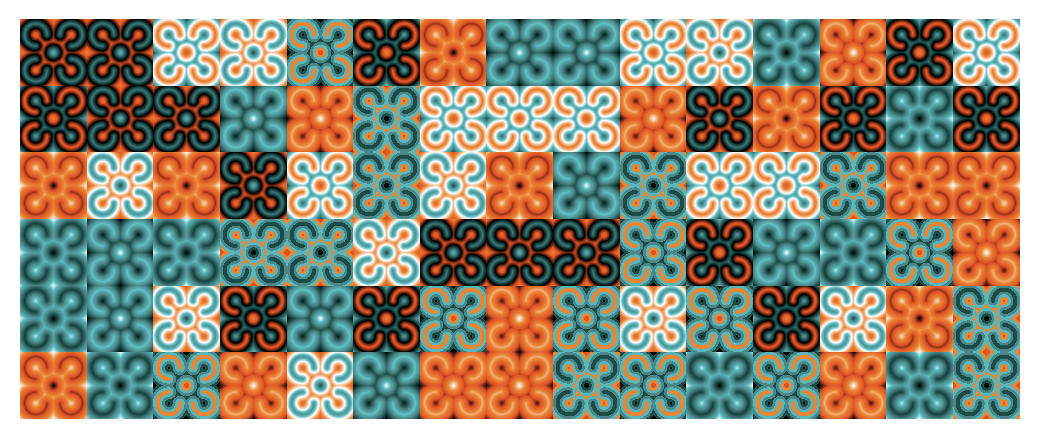

In [8]:
N = 3

colormaps = [
    hamster,
    hamster_r,
    warm_hamster,
    warm_hamster_r,
    cool_hamster,
    cool_hamster_r,  
    diverging_hamster,
    diverging_hamster_r,
    dark_diverging_hamster,
    dark_diverging_hamster_r,
]*N*N

numpy.random.shuffle(colormaps)

# Make a figure to plot on
fig = matplotlib.pyplot.figure()

# Iterate through subplots
subplot_index = 1
for colormap in colormaps:
    sp = matplotlib.pyplot.subplot(2*N, 5*N, subplot_index)
    ax = sp.imshow(sdf, cmap=colormap)
    matplotlib.pyplot.axis('off');
    subplot_index += 1

# Make sure it looks ok
fig.set_figheight(2)
fig.set_figwidth(5)
fig.set_dpi(200)
matplotlib.pyplot.tight_layout(pad=0)